In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [3]:
# tạo các cột theo các phần phối khác nhau
df = pd.DataFrame({ 
    'beta': np.random.beta(5, 1, 1000) * 60,        # beta
    'exponential': np.random.exponential(10, 1000), # exponential
    'normal_p': np.random.normal(10, 2, 1000),      # normal platykurtic
    'normal_l': np.random.normal(10, 10, 1000),     # normal leptokurtic
})

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   beta         1000 non-null   float64
 1   exponential  1000 non-null   float64
 2   normal_p     1000 non-null   float64
 3   normal_l     1000 non-null   float64
dtypes: float64(4)
memory usage: 31.4 KB


In [5]:
# thêm dữ liệu được tạo theo phân phối nhị thức
first_half = np.random.normal(20, 3, 500) 
second_half = np.random.normal(-20, 3, 500) 
bimodal = np.concatenate([first_half, second_half])

df['bimodal'] = bimodal

In [6]:
# hiển thị dữ liệu
df.head()

,beta,exponential,normal_p,normal_l,bimodal
0,57.945265,13.434576,9.891024,0.191889,25.633008
1,51.853404,2.209166,16.024219,8.309230,19.101730
2,55.309457,1.035197,8.209698,1.916880,22.306451
3,54.867070,0.777856,8.012667,0.894755,18.606330
4,34.415350,6.500426,13.064470,2.549124,19.552413


<AxesSubplot:ylabel='Density'>

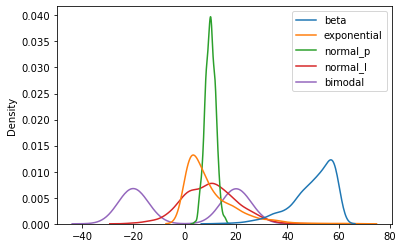

In [7]:
sns.kdeplot(data=df)

In [8]:
df.describe()

,beta,exponential,normal_p,normal_l,bimodal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.062372,9.749497,9.975965,9.807959,0.042506
std,8.366551,9.736249,1.989733,10.173510,20.265910
min,12.726029,0.022394,4.014563,-21.551112,-28.576433
25%,45.739184,2.776167,8.608903,2.422363,-20.106292
50%,52.140408,6.674529,10.005958,9.732566,-0.154161
75%,56.735230,13.683456,11.408715,16.544322,20.018694
max,59.964815,67.348724,16.024219,46.687490,29.330335


<AxesSubplot:ylabel='Density'>

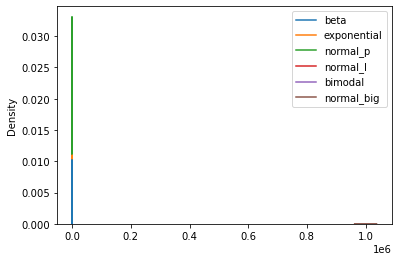

In [9]:
normal_big = np.random.normal(1000000, 10000, (1000,1))  # normal distribution of large values
df['normal_big'] = normal_big
sns.kdeplot(data=df)

<AxesSubplot:>

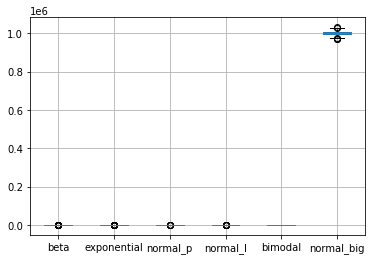

In [10]:
# trực quan hóa bằng biểu đồ box plot
df.boxplot()

In [11]:
# Khai báo đối tượng MinMaxScaler
scaler = MinMaxScaler()

In [12]:
# Chuẩn hóa dữ liệu trong df với StandardScaler
df_s = scaler.fit_transform(df)

In [13]:
# lấy danh sáchc cột
col_names = list(df.columns)

In [14]:
# chuyển về DataFrame, gán các cột của df cho dữ liệu đã được chuẩn hóa
df_s = pd.DataFrame(df_s, columns=col_names)

In [15]:
df_s.head()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,0.957248,0.199212,0.489311,0.318632,0.936150,0.921366
1,0.828289,0.032480,1.000000,0.437587,0.823361,0.496315
2,0.901451,0.015043,0.349314,0.343911,0.878704,0.773531
3,0.892086,0.011221,0.332907,0.328932,0.814806,0.649540
4,0.459142,0.096218,0.753553,0.353176,0.831144,0.177998


<AxesSubplot:ylabel='Density'>

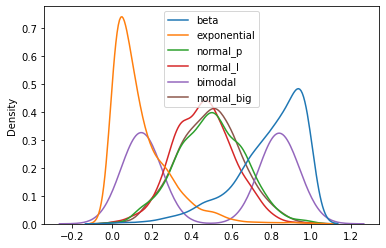

In [16]:
# biểu diễn dữ liệu đã được chuẩn hóa
sns.kdeplot(data=df_s)

<AxesSubplot:>

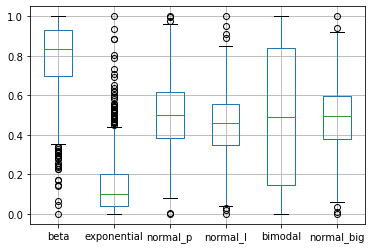

In [17]:
# trực quan hóa bằng biểu đồ box plot
df_s.boxplot()

In [18]:
# thống kê về dữ liệu được sinh ra
df_s.describe()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.790375,0.144477,0.496384,0.459550,0.494224,0.491522
std,0.177112,0.144613,0.165678,0.149087,0.349975,0.158104
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.698857,0.040902,0.382554,0.351318,0.146272,0.381653
50%,0.834365,0.098804,0.498881,0.458445,0.490828,0.495199
75%,0.931633,0.202908,0.615684,0.558268,0.839196,0.598419
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
# lấy giá trị min của cột beta
df_s['beta'].min()

0.0

In [20]:
# lấy giá trị max của cột beta
df_s['beta'].max()

1.0

In [21]:
# in các giá trị min của từng cột trong dữ liệu chưa chuẩn hóa
mins = [df[col].min() for col in df.columns]
mins

[12.726029359174964,
 0.02239370784681286,
 4.01456307408995,
 -21.5511123996232,
 -28.576432904830305,
 970069.7331368574]

In [22]:
# in các giá trị min của từng cột trong dữ liệu đã chuẩn hóa
mins = [df_s[col].min() for col in df_s.columns]
mins

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [23]:
# in các giá trị max của từng cột dữ liệu chưa chuẩn hóa
maxs = [df[col].max() for col in df.columns]
maxs

[59.964815430184316,
 67.3487238203547,
 16.02421923992384,
 46.68748974839591,
 29.330335082064863,
 1030293.5175107132]

In [24]:
# in các giá trị max của từng cột dữ liệu đã chuẩn hóa
maxs = [df_s[col].max() for col in df_s.columns]
maxs

[1.0, 1.0000000000000002, 1.0, 1.0, 1.0, 1.0]